In [3]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load the dataset (replace 'tweets.csv' with your dataset)
df = pd.read_csv("Covid-19 Twitter Dataset (Apr-Jun 2021).csv")
df = df[df['clean_tweet'].notnull()]

In [5]:
print(df['sentiment'].value_counts())

sentiment
neu    65370
pos    44756
neg    36401
Name: count, dtype: int64


In [6]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(df['clean_tweet'], df['sentiment'], test_size=0.2, random_state=42)

In [7]:
# Extract features using TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=3000)  # Adjust max_features as needed
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [8]:
# MNB
# Train Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_vectorized, y_train)

# Predict sentiment labels for test set
y_pred_NB = naive_bayes_classifier.predict(X_test_vectorized)

# Evaluate performance
accuracy_NB = accuracy_score(y_test, y_pred_NB)
print("Accuracy:", accuracy_NB)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_NB))

Accuracy: 0.8893741895857503
Classification Report:
              precision    recall  f1-score   support

         neg       0.88      0.79      0.83      7211
         neu       0.91      0.95      0.93     13192
         pos       0.86      0.88      0.87      8903

    accuracy                           0.89     29306
   macro avg       0.88      0.87      0.88     29306
weighted avg       0.89      0.89      0.89     29306



### Hyperparameter Tuning

In [9]:
# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

# Define the hyperparameters to tune
parameters = {
    'tfidf__max_features': [1000, 2000, 3000, 4000, 5000],
    'tfidf__min_df': [1, 2, 3, 4 , 5],
    'tfidf__max_df': [0.5, 0.7, 0.9],
    'nb__alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100, 1000]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_NB_Hyper = best_model.predict(X_test)
accuracy_NB_Hyper = accuracy_score(y_test, y_pred_NB_Hyper)
print("Test Accuracy:", accuracy_NB_Hyper)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Best Parameters: {'nb__alpha': 1e-05, 'tfidf__max_df': 0.7, 'tfidf__max_features': 4000, 'tfidf__min_df': 5}
Test Accuracy: 0.8956868900566437


In [10]:
# Optimum MNB
# Extract features using TF-IDF vectorizer
vectorizer_OMNB = TfidfVectorizer(max_features=4000, max_df=0.7, min_df=5)  # Adjust max_features as needed
X_train_vectorized = vectorizer_OMNB.fit_transform(X_train)
X_test_vectorized = vectorizer_OMNB.transform(X_test)

# Train Naive Bayes classifier
naive_bayes_classifier_optimum = MultinomialNB(alpha=0.00001)
naive_bayes_classifier_optimum.fit(X_train_vectorized, y_train)

# Predict sentiment labels for test set
y_pred_OMNB = naive_bayes_classifier_optimum.predict(X_test_vectorized)

# Evaluate performance
accuracy_OMNB = accuracy_score(y_test, y_pred_OMNB)
print("Accuracy:", accuracy_OMNB)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_OMNB))

Accuracy: 0.8956868900566437
Classification Report:
              precision    recall  f1-score   support

         neg       0.86      0.82      0.84      7211
         neu       0.94      0.94      0.94     13192
         pos       0.85      0.89      0.87      8903

    accuracy                           0.90     29306
   macro avg       0.89      0.88      0.88     29306
weighted avg       0.90      0.90      0.90     29306



In [11]:
# Logistic Regression
# Train logistic regression classifier
logreg_classifier = LogisticRegression(multi_class='ovr')  # Change multi_class to 'multinomial' for multinomial logistic regression
logreg_classifier.fit(X_train_vectorized, y_train)

# Predict sentiment labels for test set
y_pred_lr = logreg_classifier.predict(X_test_vectorized)

# Evaluate performance
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy_lr)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

Accuracy: 0.9530812802839009
Classification Report:
              precision    recall  f1-score   support

         neg       0.96      0.89      0.93      7211
         neu       0.94      1.00      0.97     13192
         pos       0.96      0.94      0.95      8903

    accuracy                           0.95     29306
   macro avg       0.96      0.94      0.95     29306
weighted avg       0.95      0.95      0.95     29306



In [12]:
# Train Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train_vectorized, y_train)

# Predict sentiment labels for test set
y_pred_DT = decision_tree_classifier.predict(X_test_vectorized)

# Evaluate performance
accuracy_DT = accuracy_score(y_test, y_pred_DT)
print("Accuracy:", accuracy_DT)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_DT))

Accuracy: 0.9488500648331399
Classification Report:
              precision    recall  f1-score   support

         neg       0.92      0.90      0.91      7211
         neu       0.97      0.98      0.98     13192
         pos       0.93      0.94      0.93      8903

    accuracy                           0.95     29306
   macro avg       0.94      0.94      0.94     29306
weighted avg       0.95      0.95      0.95     29306



In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.fit_transform(y_test)

# Train XGBoost classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train_vectorized, y_train_encoded)

# Predict sentiment labels for test set
y_pred_XGB = xgb_classifier.predict(X_test_vectorized)

# Evaluate performance
accuracy_XGB = accuracy_score(y_test_encoded, y_pred_XGB)
print("Accuracy:", accuracy_XGB)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred_XGB))

Accuracy: 0.9110421074182761
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.80      0.87      7211
           1       0.86      1.00      0.93     13192
           2       0.96      0.88      0.92      8903

    accuracy                           0.91     29306
   macro avg       0.93      0.89      0.90     29306
weighted avg       0.92      0.91      0.91     29306



In [14]:
# Convert data to LightGBM Dataset format
train_data = lgb.Dataset(X_train_vectorized, label=y_train_encoded)
test_data = lgb.Dataset(X_test_vectorized, label=y_test_encoded)

# Set parameters for LightGBM model
params = {
    'objective': 'multiclass',
    'num_class': 3,  # Number of classes (sentiments)
    'metric': 'multi_logloss'
}

# Train LightGBM model
num_round = 100
lgb_model = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Predict sentiment labels for test set
y_pred_LGBM = lgb_model.predict(X_test_vectorized).argmax(axis=1)

# Evaluate performance
accuracy_LGBM = accuracy_score(y_test_encoded, y_pred_LGBM)
print("Accuracy:", accuracy_LGBM)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred_LGBM))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.208047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 229846
[LightGBM] [Info] Number of data points in the train set: 117221, number of used features: 3998
[LightGBM] [Info] Start training from score -1.390235
[LightGBM] [Info] Start training from score -0.809400
[LightGBM] [Info] Start training from score -1.184634
Accuracy: 0.9488159421278919
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      7211
           1       0.93      1.00      0.96     13192
           2       0.97      0.94      0.95      8903

    accuracy                           0.95     29306
   macro avg       0.95      0.94      0.94     29306
weighted avg       0.95      0.95      0.95     29306



In [15]:
# Train CatBoost classifier
catboost_classifier = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, loss_function='MultiClass')
catboost_classifier.fit(X_train_vectorized, y_train, verbose=0)

# Predict sentiment labels for test set
y_pred_CB = catboost_classifier.predict(X_test_vectorized)

# Evaluate performance
accuracy_CB = accuracy_score(y_test, y_pred_CB)
print("Accuracy:", accuracy_CB)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_CB))

Accuracy: 0.7906913260083259
Classification Report:
              precision    recall  f1-score   support

         neg       0.94      0.55      0.69      7211
         neu       0.71      1.00      0.83     13192
         pos       0.92      0.68      0.78      8903

    accuracy                           0.79     29306
   macro avg       0.86      0.74      0.77     29306
weighted avg       0.83      0.79      0.78     29306



In [16]:
# Train Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train_vectorized, y_train)

# Predict sentiment labels for test set
y_pred_RF = random_forest_classifier.predict(X_test_vectorized)

# Evaluate performance
accuracy_RF = accuracy_score(y_test, y_pred_RF)
print("Accuracy:", accuracy_RF)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_RF))

Accuracy: 0.95929161263905
Classification Report:
              precision    recall  f1-score   support

         neg       0.96      0.90      0.93      7211
         neu       0.97      1.00      0.98     13192
         pos       0.94      0.95      0.95      8903

    accuracy                           0.96     29306
   macro avg       0.96      0.95      0.95     29306
weighted avg       0.96      0.96      0.96     29306



In [17]:
# Train SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_vectorized, y_train)

# Predict sentiment labels for test set
y_pred = svm_classifier.predict(X_test_vectorized)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9715075411178599
Classification Report:
              precision    recall  f1-score   support

         neg       0.97      0.94      0.95      7211
         neu       0.97      1.00      0.98     13192
         pos       0.97      0.96      0.97      8903

    accuracy                           0.97     29306
   macro avg       0.97      0.97      0.97     29306
weighted avg       0.97      0.97      0.97     29306



In [27]:
# Visualization Function
def visualize(test, prediction, classifier, name):
    conf_mat_XGB = confusion_matrix(test, prediction)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_mat_XGB, annot=True, fmt='d', cmap="Blues", xticklabels=classifier.classes_, yticklabels=classifier.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix {0}'.format(name))
    plt.show()

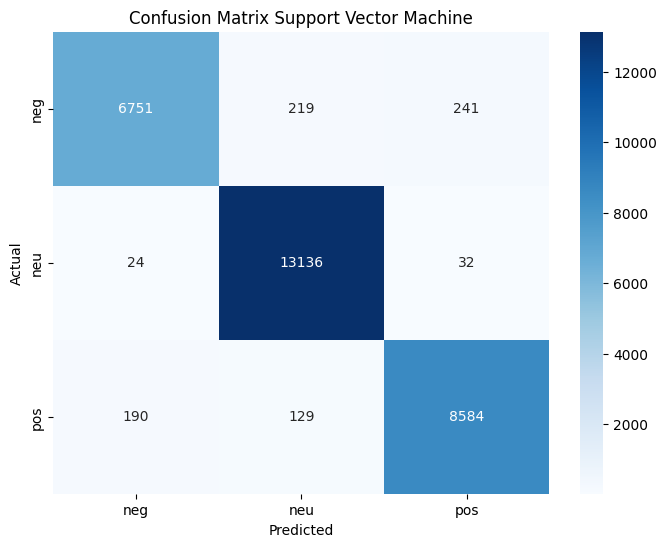

In [40]:
visualize(y_test, y_pred, svm_classifier, "Support Vector Machine")

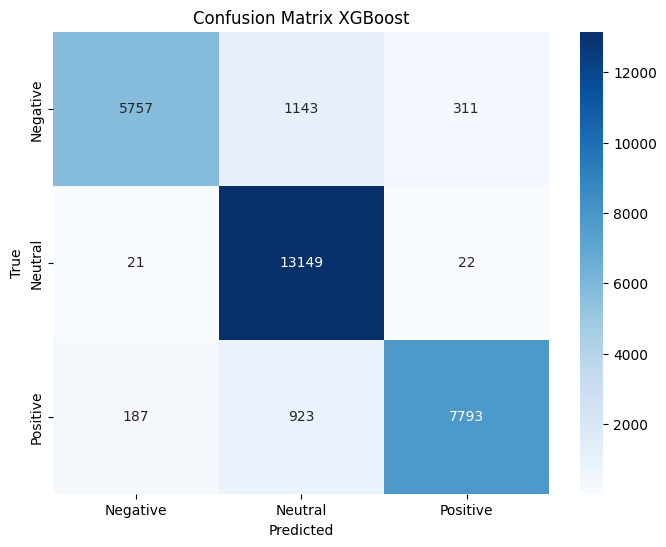

In [37]:
conf_matrix = confusion_matrix(y_test_encoded, y_pred_XGB)

# Step 2: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix XGBoost')
plt.show()